## Appendix 1 - Python Code and Outputs

### Data Preparation

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Data

In [3]:
import pandas as pd
titanic_training_data = pd.read_csv('train.csv')

# show first five rows of the data
titanic_training_data.head(100)
# show number of columns and rows
titanic_training_data.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


(891, 12)

#### Variable Key Guide:

| Variable name | Variable label | Variable value and value label | Variable type |
| :-: | :-: | :-: | :-: |
| PassengerID | Passenger ID | | Numerical |
| Survived | Did the passenger survive? | 0 = No, 1 = Yes | Indicator, dichotomous |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical, or ordinal |
| Name | Passenger name | | String |
| Sex | Passenger's sex | Male, Female | Categorical or indicator |
| Age | Passenger's age | | Numerical |
| Sibsp | # of siblings / spouses aboard the Titanic | | Numerical | 
| Parch | # of parents / children aboard the Titanic | | Nmerical |
| Ticket | Ticket number | | String |
| Fare | Passenger fare | | Numerical, continuous |
| Cabin | Cabin number | | Categorical |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical |

### Exploratory Data Analysis

First, we can categorize each variable as either an indicator variable, multi-category categorical variable, or numeric variable.  Then we can proceed in our exploratory data analysis by constructing the appropriate visualization for each type of variable.

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

<AxesSubplot:title={'center':'Pclass'}>

<AxesSubplot:title={'center':'Embarked'}>

<AxesSubplot:title={'center':'Cabin'}>

<AxesSubplot:title={'center':'Sex'}>

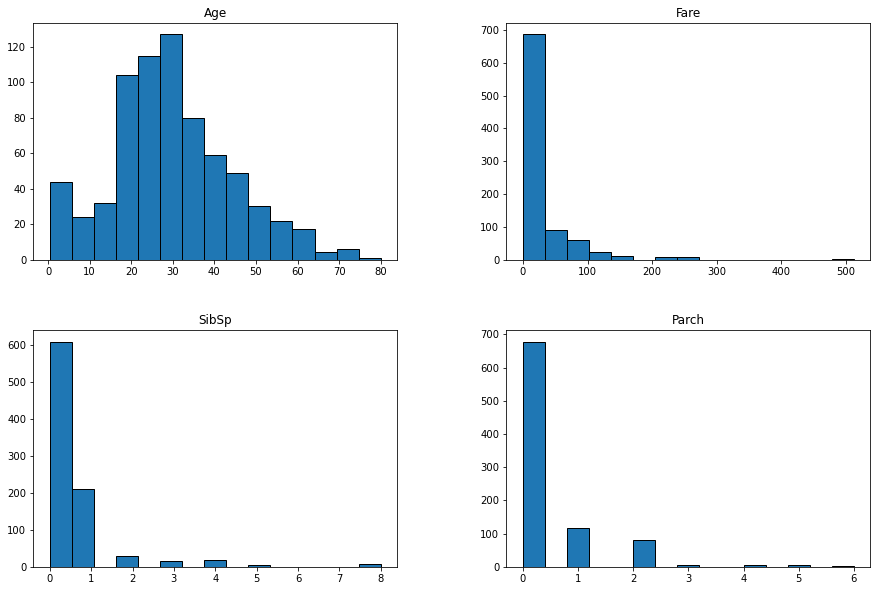

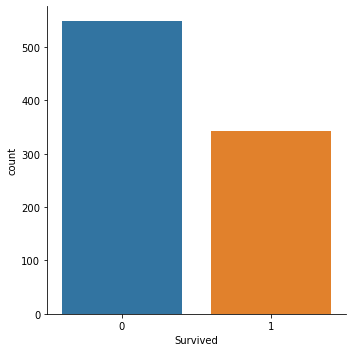

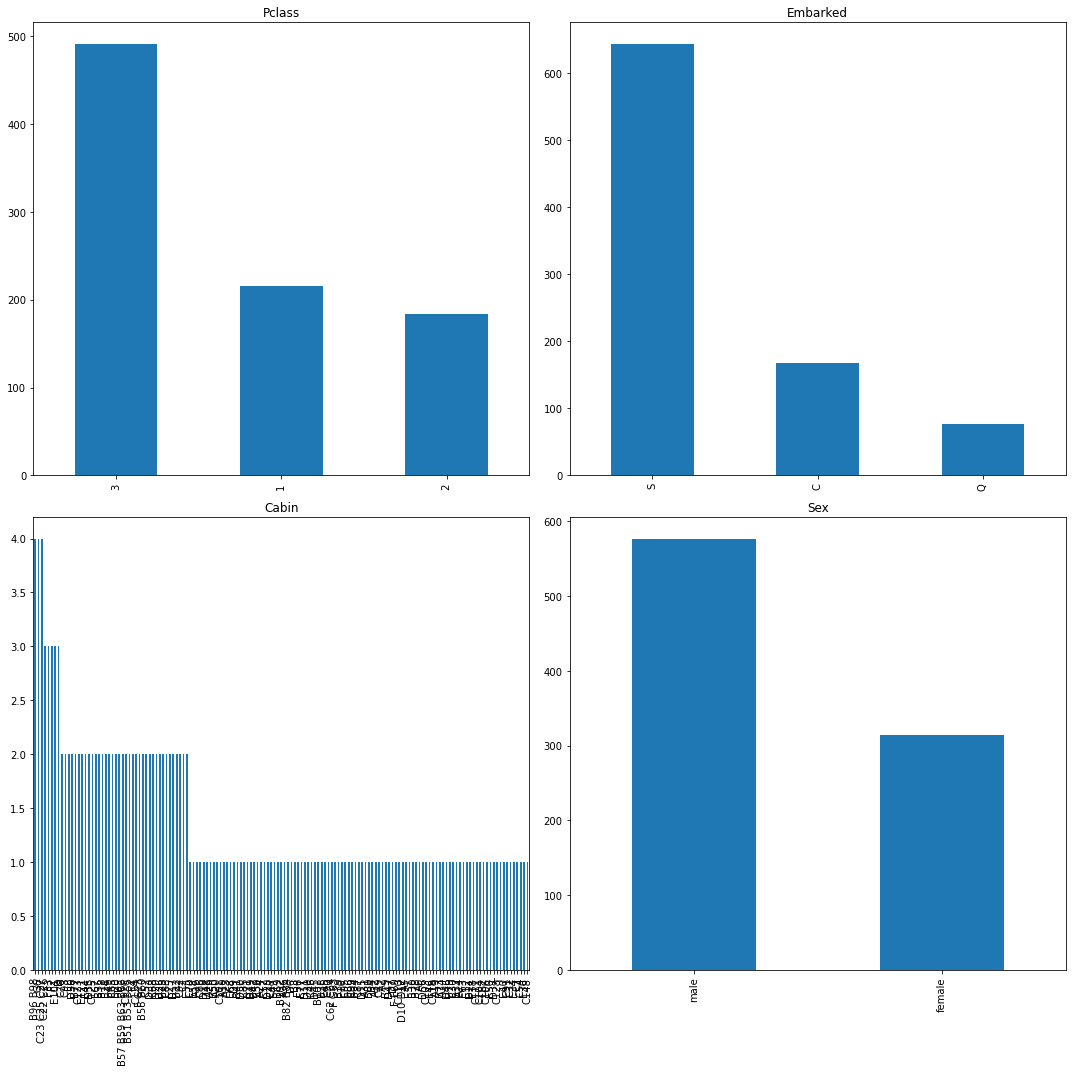

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

indicator_variables = ['Survived']

categorical_variables = ['Pclass', 'Embarked', 'Cabin', 'Sex']

# Numeric Variable Visualizations
titanic_training_data[numeric_variables].describe()

titanic_training_data[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)


# Indicator Variable Visualizations
sns.catplot(x = 'Survived', kind = 'count', data = titanic_training_data)


# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_training_data[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()





### Investigation of Missing Data and Outliers

In [5]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data.isnull().sum()
null_percentage = titanic_training_data.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
Cabin,687,77.104377,object
Age,177,19.865320,float64
Embarked,2,0.224467,object


Let's address the missing data appropriately in a new dataframe that we'll name titanic_training_data_cleaned.

In [6]:
# Create a new dataframe called titanic_training_data_cleaned so we don't modify the originally imported data
titanic_training_data_cleaned = titanic_training_data.copy(deep=True)

# change Null values to the most common value (S) for Embarked 
titanic_training_data_cleaned['Embarked'].fillna('S', inplace=True)

# fill Nulls for Age with median value
titanic_training_data_cleaned['Age'].fillna(titanic_training_data_cleaned['Age'].median(), inplace=True)

# Create new cabin-related variables that will be more useful and cleaner than the original cabin variable
titanic_training_data_cleaned['Cabin_Data_Indicator'] = titanic_training_data_cleaned['Cabin'].notna().astype(int)

titanic_training_data_cleaned['First_Cabin_Deck'] = np.where(titanic_training_data_cleaned['Cabin_Data_Indicator'] == 1,
                                                             titanic_training_data_cleaned['Cabin'].astype(str).str[0],
                                                             'None')

# Create a new variable indicating whether a passenger is a child
titanic_training_data_cleaned['Child_Indicator'] = titanic_training_data_cleaned['Age'] <= 17
titanic_training_data_cleaned['Child_Indicator'] = titanic_training_data_cleaned['Child_Indicator'].astype(int)


# Theoretically we could create a new variable for cabin number here if we're interested in that
# Time permitting, maybe I will circle back to work on that some more, but for now I'm moving on to focus on more
# important pieces of this assignment - especially since intuitively I don't think cabin number should make a huge
# difference for survival rates

# There also could be value in creating a variable about marriage status based on whether the names contain "Miss" or "Mrs"
# But we can circle back to that if we have time I think

# Drop the original Cabin variable since it has so many null values and since some passengers had more than one cabin
# making the original variable difficult to work with
titanic_training_data_cleaned.drop(['Cabin'],axis=1,inplace=True)

In [7]:
titanic_training_data_cleaned['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Check the distributions of the variables in the newly cleaned dataframe.  Also, check for missing values in this new dataframe.

In [9]:
# show first five rows of the data
titanic_training_data_cleaned.head(20)
# show number of columns and rows
titanic_training_data_cleaned.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,None,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,None,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,None,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,None,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,E,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,None,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,None,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,None,1


(891, 14)

#### Variable Key Guide:

| Variable name | Variable label | Variable value and value label | Variable type |
| :-: | :-: | :-: | :-: |
| PassengerID | Passenger ID | | Numerical |
| Survived | Did the passenger survive? | 0 = No, 1 = Yes | Indicator, dichotomous |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical |
| Name | Passenger name | | String |
| Sex | Passenger's sex | Male, Female | Categorical |
| Age | Passenger's age | | Numerical |
| Sibsp | # of siblings / spouses aboard the Titanic | | Numerical | 
| Parch | # of parents / children aboard the Titanic | | Nmerical |
| Ticket | Ticket number | | String |
| Fare | Passenger fare | | Numerical, continuous |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical |
| Cabin Data Indicator | Cabin number | | Indicator, dichotomuous |
| First cabin deck | In first cabin class | | Categorical |
| Child_indicator | Was a child, under 18 years old | | Indicator, dichotomuous |

In [10]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data_cleaned.isnull().sum()
null_percentage = titanic_training_data_cleaned.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data_cleaned.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


,Age,Fare,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.523008,0.381594
std,13.019697,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,35.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

<AxesSubplot:title={'center':'Pclass'}>

<AxesSubplot:title={'center':'Embarked'}>

<AxesSubplot:title={'center':'First_Cabin_Deck'}>

<AxesSubplot:title={'center':'Sex'}>

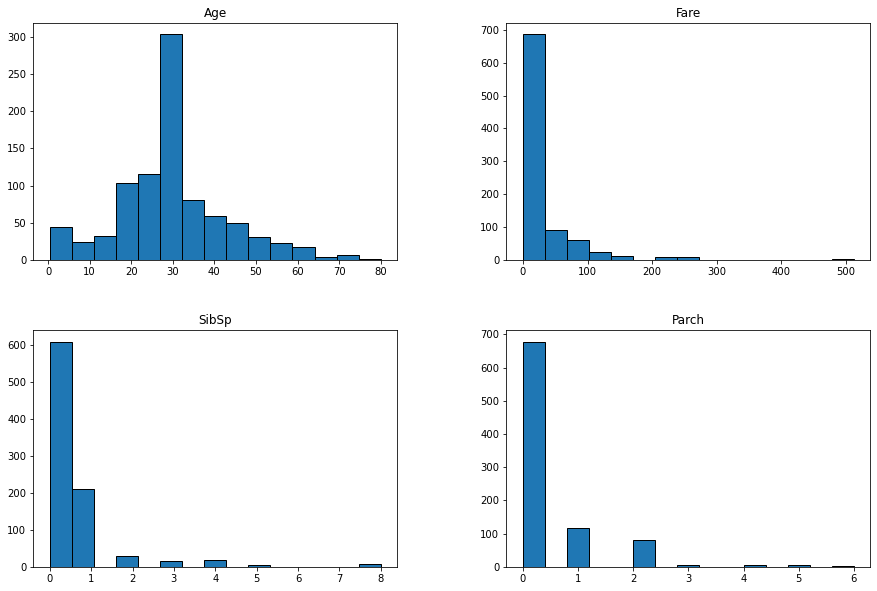

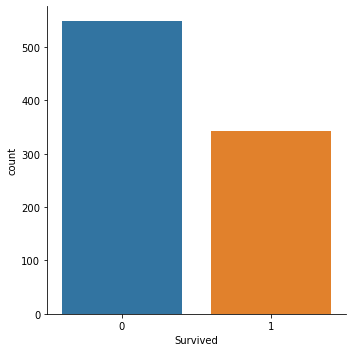

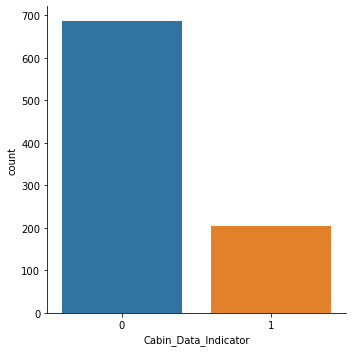

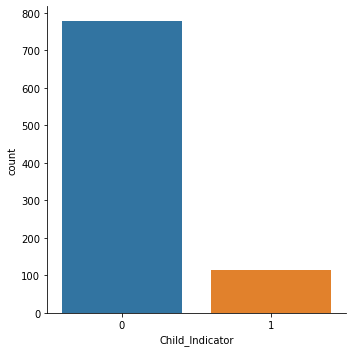

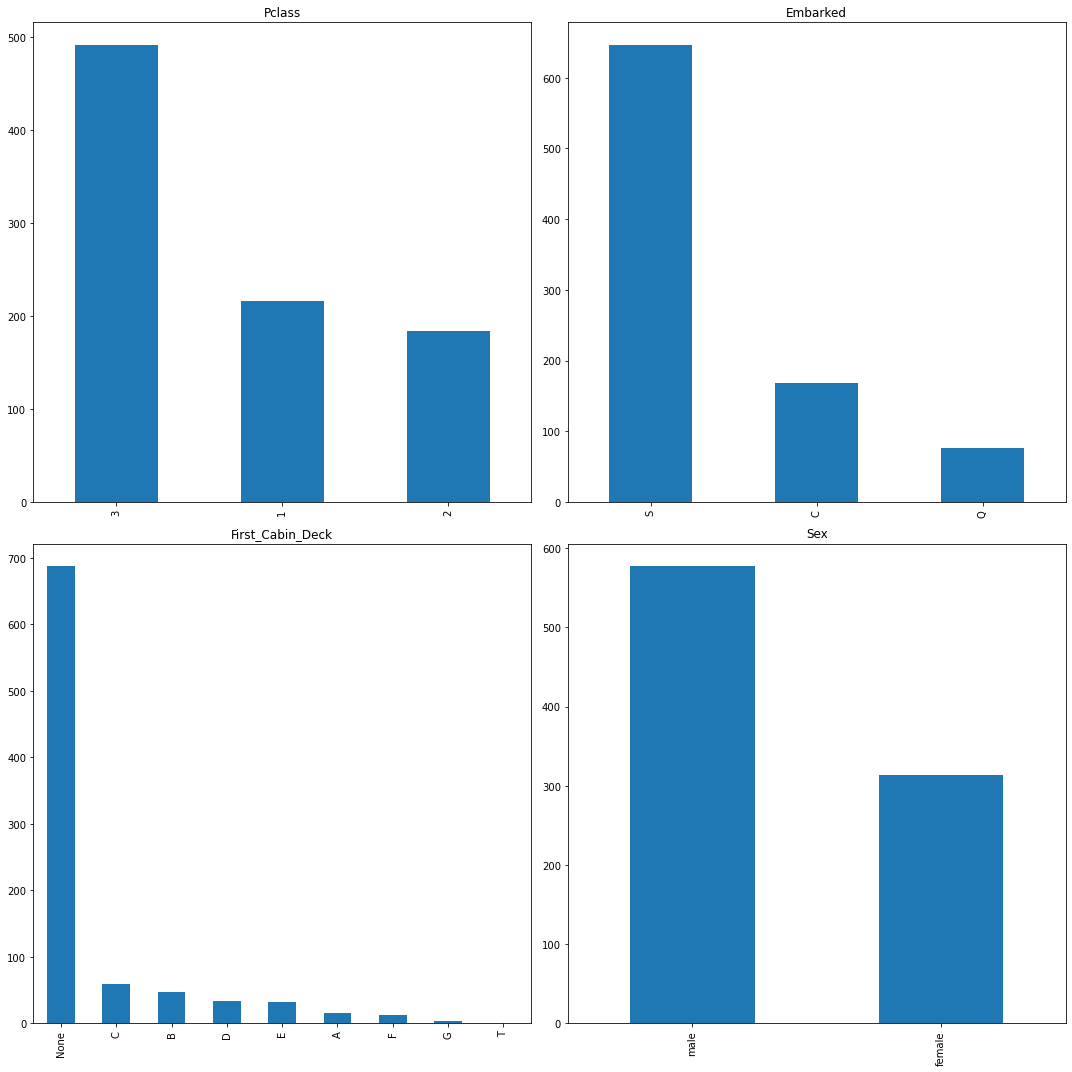

In [11]:
# Update our definitions of the indicator, numeric, and categorical variables to reflect our newly created variables
numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

indicator_variables = ['Survived', 'Cabin_Data_Indicator', 'Child_Indicator']

categorical_variables = ['Pclass', 'Embarked', 'First_Cabin_Deck', 'Sex']

# Numeric Variable Visualizations
titanic_training_data_cleaned[numeric_variables].describe()

titanic_training_data_cleaned[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)

# Indicator Variable Visualizations

for var, subplot in zip(indicator_variables, ax.flatten()):
    sns.catplot(x = var, kind = 'count', data = titanic_training_data_cleaned)

fig.tight_layout()

    
# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_training_data_cleaned[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()


### Examination of the Relationship between the Dependent Variable and Potential Predictors

Let's create some visualizations to examine the relationship between potential predictors and our dependent variable.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

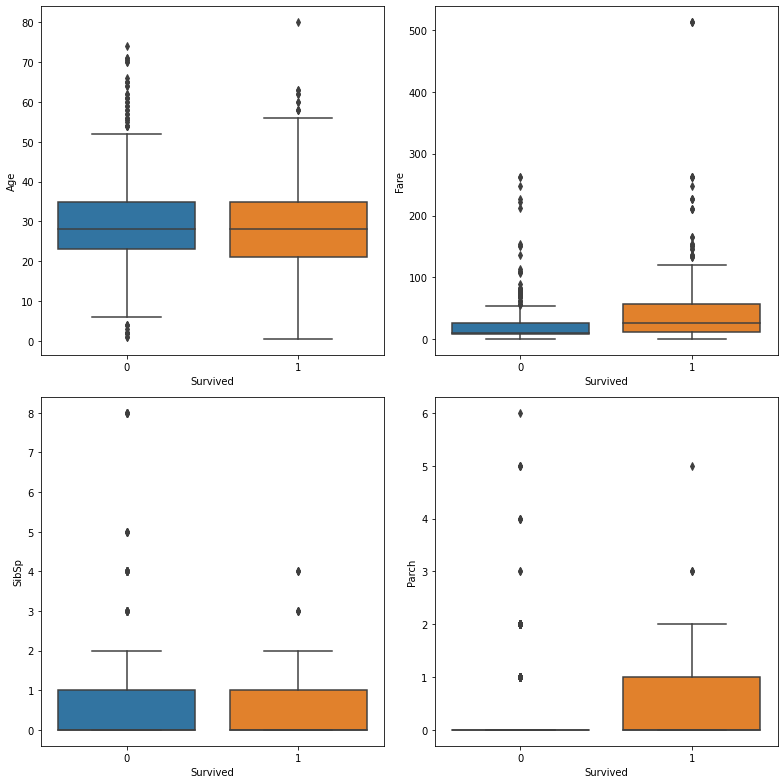

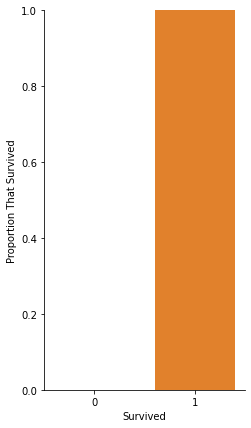

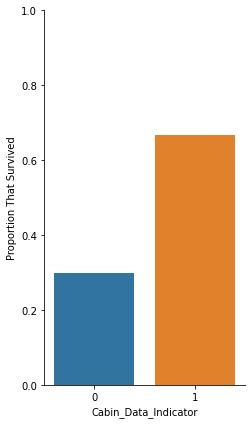

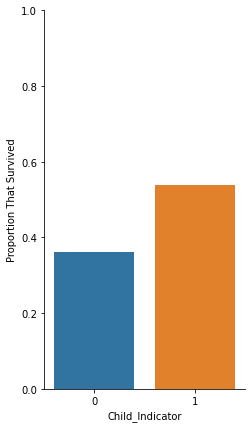

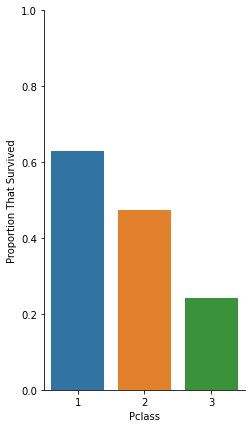

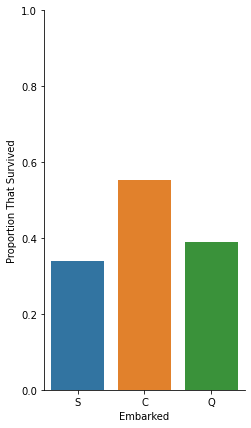

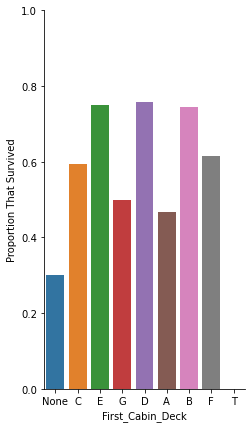

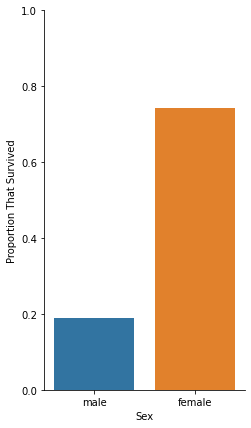

In [12]:
# Numeric Variable Visualizations

fig, ax = plt.subplots(2, 2, figsize=(11, 11))

for var, subplot in zip(numeric_variables, ax.flatten()):
         sns.boxplot(x = 'Survived', y = var, data=titanic_training_data_cleaned, ax=subplot)

fig.tight_layout()

# Indicator Variable Visualizations

for var, subplot in zip(indicator_variables, ax.flatten()):
    g = sns.catplot(
        data = titanic_training_data_cleaned, 
        x = var, 
        y = "Survived",
        kind = "bar",
        height = 6,
        aspect = 0.6,
        ci = None)

    g.set_axis_labels(var, "Proportion That Survived")
    g.set(ylim = (0,1))

fig.tight_layout()



# Categorical Variable Visualizations
for var, subplot in zip(categorical_variables, ax.flatten()):
    g = sns.catplot(
        data = titanic_training_data_cleaned, 
        x = var, 
        y = "Survived",
        kind = "bar",
        height = 6,
        aspect = 0.6,
        ci = None)

    g.set_axis_labels(var, "Proportion That Survived")
    g.set(ylim = (0,1))

fig.tight_layout()




### Random Forest

First, we need to conduct data cleaning exercises that will be needed only for the Random Forest data model.  We will complete these exercises in a copy of the training dataset so that we don't impact other subsequent data anlayses.

In [28]:
# Create a copy of the training dataset
rf_training_validation_df = titanic_training_data_cleaned.copy(deep=True)

# Drop variables from the training dataset that we do not want to be included in the Random Forest model
rf_training_validation_df.drop(['PassengerId', 'Name', 'Ticket', 'First_Cabin_Deck'], axis=1, inplace=True)

# Encode the sex and embarked variables
rf_training_validation_df['Female_Indicator'] = np.where(rf_training_validation_df['Sex'] == 'female', 1, 0)
rf_training_validation_df.drop(['Sex'], axis=1, inplace=True)

rf_training_validation_df['Embarked_C_Indicator'] = np.where(rf_training_validation_df['Embarked'] == 'C', 1, 0)
rf_training_validation_df['Embarked_Q_Indicator'] = np.where(rf_training_validation_df['Embarked'] == 'Q', 1, 0)
rf_training_validation_df.drop(['Embarked'], axis=1, inplace=True)

Next, we will use our training and validation datasets to conduct hyperparameter tuning to find the best hyperparameters for random forest modeling.

In [29]:

# Import Required Modules
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

# Split the training dataset into predictor and outcome components
rf_train_validation_x = rf_training_validation_df.drop('Survived', axis=1)
rf_train_validation_y = rf_training_validation_df['Survived']

# Split the Kaggle Titanic training data into training and validation components
rf_x_train, rf_x_validation, rf_y_train, rf_y_validation = train_test_split(rf_train_validation_x,
                                                                      rf_train_validation_y, 
                                                                            test_size=0.2, 
                                                                           random_state = 1)

# Conduct hyperparameter tuning for random forest models
param_dist = {'n_estimators': randint(10,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(rf_x_train, rf_y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022F37689C40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022F310868E0>})

Best hyperparameters: {'max_depth': 8, 'n_estimators': 433}


Next, we will assess the strength of the random forest model associated with the optimal hyperparameters by applying the model to the validation dataset and observing the resulting confusion matrix, accuracy, precision, and recall.

Accuracy: 0.7932960893854749
Precision: 0.875
Recall: 0.5753424657534246


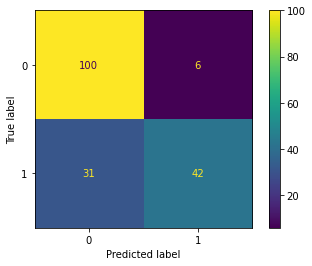

In [32]:

# Generate predictions with the best model
y_validation_predictions_rf = best_rf.predict(rf_x_validation)

# Create the confusion matrix associated with the best random forest model
cm = confusion_matrix(rf_y_validation, y_validation_predictions_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Calculate the accuracy, precision, and recall associated with the predictions of the best random forest model

accuracy_rf_validation = accuracy_score(rf_y_validation, y_validation_predictions_rf)
precision_rf_validation = precision_score(rf_y_validation, y_validation_predictions_rf)
recall_rf_validation = recall_score(rf_y_validation, y_validation_predictions_rf)

print("Accuracy:", accuracy_rf_validation)
print("Precision:", precision_rf_validation)
print("Recall:", recall_rf_validation)


Next, we will visually display the variable importance metrics elicited from the random forest models associated with the optimal hyperparameter values.

In [ ]:

# Plot a bar chart to display variable importances in the random forest models associated with the best hyperparameters
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar();

We can also visually display the first few trees from the random forest models associated with the optimal hyperparameters.

In [13]:


# Visually display the first 3 trees from the random forest models associated with the best hyperparameters

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,None,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,None,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,None,0


### Logistic Regression

#### First let's examine the relationship between variables

<AxesSubplot:>

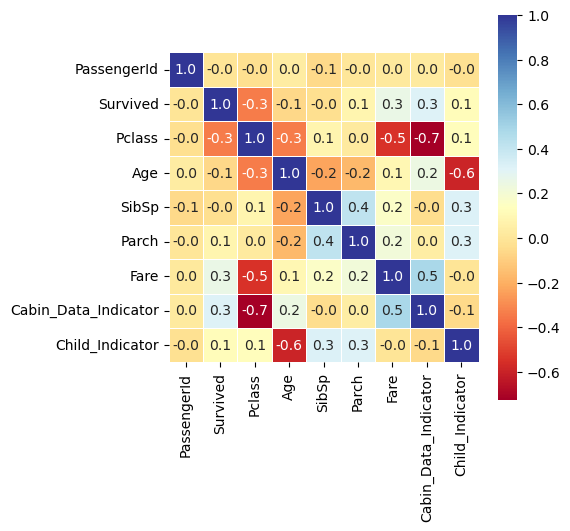

In [11]:
titanic_correlations = titanic_training_data_cleaned
correlations_training = titanic_correlations.corr()

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlations_training, vmax = 1, square = True, annot = True,
           cmap = 'RdYlBu', linewidths = 0.5, fmt=".1f")

<AxesSubplot:>

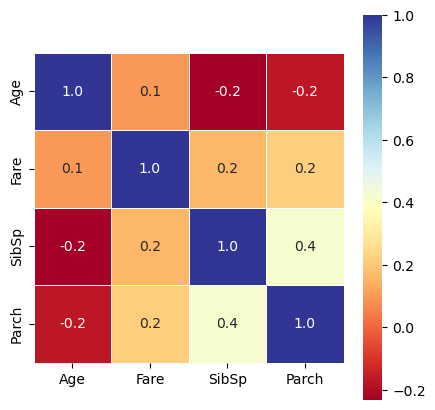

In [12]:
titanic_correlations = titanic_training_data_cleaned[numeric_variables]
correlations_training = titanic_correlations.corr()

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlations_training, vmax = 1, square = True, annot = True,
           cmap = 'RdYlBu', linewidths = 0.5, fmt=".1f")

The Pearson correlations suggest that Pclass is strongly associated with Cabin_data_indicator. The following were moderately associated: 1) age and child_indicator, 2) fare and Pclass, and 3) fare and cabin_data_indicator.

<i>Note: Moderately associated: .5 - .7, strongly associated: >.7</i>

No variables were strongly or moderately associated with Survived. In fact, the Pearson correlation analysis suggested there were weak associations, and there may be no issues with multicollinearity among these variables. 


### Point Biserial correlations between Survived and continuous data

In [13]:
from scipy import stats

#Point biserial correlation coefficient and p value for survived and age:
corr1 = stats.pointbiserialr(titanic_training_data_cleaned.Survived, titanic_training_data_cleaned.Age)
print("Point biserial correlation coefficient and p value for sale price and age:")
corr1
#Point biserial correlation coefficient and p value for survived and fare:
corr2 = stats.pointbiserialr(titanic_training_data_cleaned.Survived, titanic_training_data_cleaned.Fare)
print("Point biserial correlation coefficient and p value for sale price and fare:")
corr2
#Point biserial correlation coefficient and p value for survived and Sibsp:
corr3 = stats.pointbiserialr(titanic_training_data_cleaned.Survived, titanic_training_data_cleaned.SibSp)
print("Point biserial correlation coefficient and p value for sale price and Sibsp:")
corr3
#Point biserial correlation coefficient and p value for survived and Parch:
corr4 = stats.pointbiserialr(titanic_training_data_cleaned.Survived, titanic_training_data_cleaned.Parch)
print("Point biserial correlation coefficient and p value for sale price and Parch:")
corr4

Point biserial correlation coefficient and p value for sale price and age:


PointbiserialrResult(correlation=-0.06491041993052588, pvalue=0.05276068847580145)

Point biserial correlation coefficient and p value for sale price and fare:


PointbiserialrResult(correlation=0.2573065223849624, pvalue=6.120189341917992e-15)

Point biserial correlation coefficient and p value for sale price and Sibsp:


PointbiserialrResult(correlation=-0.03532249888573556, pvalue=0.2922439286980196)

Point biserial correlation coefficient and p value for sale price and Parch:


PointbiserialrResult(correlation=0.08162940708348347, pvalue=0.014799245374712841)

Given that the outcome of interest (Survived) is dichotomous, a series Point Biserial analyses were employed to examine associations between continuous IVs and the DV. As suggested by the series of Pearson correlations, Survived exhibited weak assocations with all continuous variables.  

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
x = titanic_training_data_cleaned[['Age', 'Fare', 'SibSp', 'Parch']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)
x.corr()

  feature       VIF
0     Age  1.436234
1    Fare  1.532322
2   SibSp  1.437732
3   Parch  1.493068


,Age,Fare,SibSp,Parch
Age,1.000000,0.096688,-0.233296,-0.172482
Fare,0.096688,1.000000,0.159651,0.216225
SibSp,-0.233296,0.159651,1.000000,0.414838
Parch,-0.172482,0.216225,0.414838,1.000000


An inspection of VIF values suggested that there was no evidence of multicollinearity present among continuous variables.

#### Further examination of the data grouping by Survived vs Died

In [15]:
titanic_training_data_cleaned.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_Data_Indicator,Child_Indicator
Survived,,,,,,,,
0,447.016393,2.531876,30.028233,0.553734,0.329690,22.117887,0.123862,0.094718
1,444.368421,1.950292,28.291433,0.473684,0.464912,48.395408,0.397661,0.178363


### Encode Embarked, Sex, and First Cabin Deck

In [16]:
# Encode Embarked, Sex, and First Cabin Deck
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Embarked
le.fit(np.array(titanic_training_data_cleaned['Embarked']).reshape(-1,1))
titanic_training_data_cleaned['encoded_Embarked'] = le.transform(titanic_training_data_cleaned['Embarked'])

# Cabin Deck
le.fit(np.array(titanic_training_data_cleaned['First_Cabin_Deck']).reshape(-1,1))
titanic_training_data_cleaned['encoded_FirstCabinDeck'] = le.transform(titanic_training_data_cleaned['First_Cabin_Deck'])

# Sex
le.fit(np.array(titanic_training_data_cleaned['Sex']).reshape(-1,1))
titanic_training_data_cleaned['encoded_Sex'] = le.transform(titanic_training_data_cleaned['Sex'])

Survived = titanic_training_data_cleaned['Survived'].to_list()
classification_model_data = titanic_training_data_cleaned.drop(                                                            
                                                               columns=['Sex','PassengerId', 
                                                                        'Survived','Name','Ticket',
                                                                        'Embarked','First_Cabin_Deck',
                                                                        'Age', 'SibSp', 'Fare', 'encoded_FirstCabinDeck',
                                                                        'Parch', 'Cabin_Data_Indicator'
                                                                       ])


C:\Users\mhurt\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

C:\Users\mhurt\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

C:\Users\mhurt\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [17]:
classification_model_data.head()

,Pclass,Child_Indicator,encoded_Embarked,encoded_Sex
0,3,0,2,1
1,1,0,0,0
2,3,0,2,0
3,1,0,2,0
4,3,0,2,1


#### Dummy coding categorical variables

In [18]:
cat_vars=['encoded_Embarked']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(classification_model_data[var], prefix=var)
    classification_model_data=classification_model_data.join(cat_list)

data_vars=classification_model_data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=classification_model_data[to_keep]
data_final.columns.values


classification_model_data = classification_model_data.drop(                                                            
                                                               columns=['encoded_Embarked_0', 'encoded_Embarked'
                                                                       ])

array(['Pclass', 'Child_Indicator', 'encoded_Sex', 'encoded_Embarked_0',
       'encoded_Embarked_1', 'encoded_Embarked_2'], dtype=object)

In [19]:
np.array(classification_model_data)
titanic_training_data_cleaned['Survived']

array([[3, 0, 1, 0, 1],
       [1, 0, 0, 0, 0],
       [3, 0, 0, 0, 1],
       ...,
       [3, 0, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [3, 0, 1, 1, 0]], dtype=int64)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Logistic Regression

Optimization terminated successfully.
         Current function value: 0.452127
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.3210
Time:                        19:48:44   Log-Likelihood:                -402.85
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.751e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6276      0.335     10.830      0.000       2.971       4.284
x1            -1.0279      0.

Text(0.5, 1.0, 'Logistic ROC Curve')

Text(0.5, 1.0, 'Logistic Precision-Recall Curve')

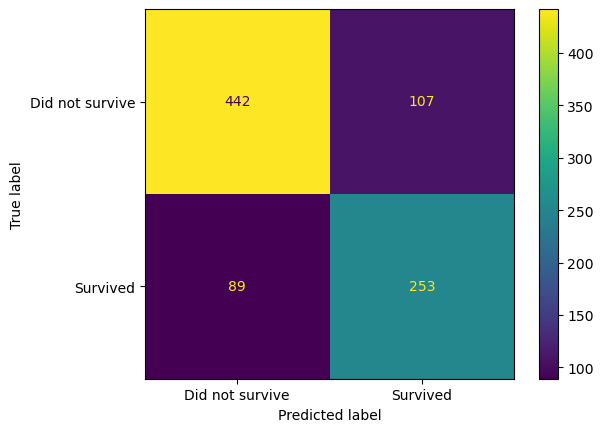

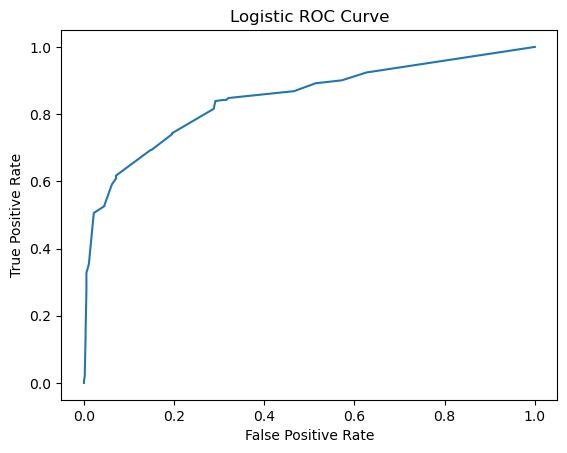

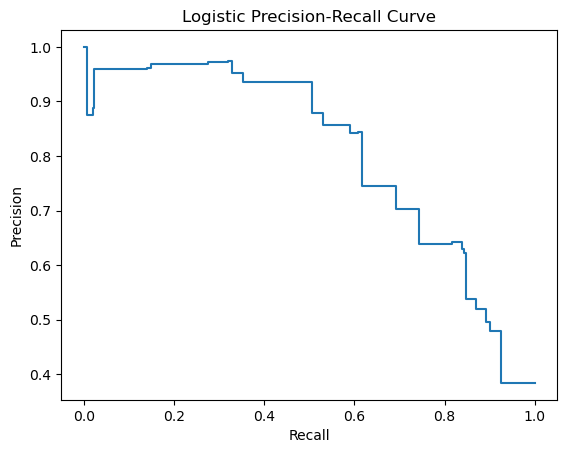

In [20]:
from scipy.signal._signaltools import _centered
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# predictors
X = np.array(classification_model_data)

# add constant
X = sm.add_constant(X)

# response
y = titanic_training_data_cleaned['Survived']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())
probabilities = result.predict(X)

# Convert probabilities to binary predictions using a 0.5 threshold
y_pred = np.where(probabilities > 0.5, 1, 0)

# Calculate the accuracy score
acc_score = accuracy_score(y, y_pred)
print("Accuracy Score:", acc_score)

# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

cm = confusion_matrix(y, y_pred)
cm_logistic = cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive','Survived'])
disp.plot()

# Curves

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay


fpr, tpr, _ = roc_curve(np.array(y), probabilities)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('Logistic ROC Curve')

prec, recall, _ = precision_recall_curve(y, probabilities)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('Logistic Precision-Recall Curve')

#### Logistic regression: Odds ratios

In [21]:
model_odds = pd.DataFrame(np.exp(result.params), columns= ['OR'])
model_odds['z-value']= result.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
const,37.622838,2.473094e-27,19.513796,72.537295
x1,0.357756,5.682098e-19,0.285270,0.448660
x2,2.744373,1.345671e-04,1.634429,4.608084
x3,0.075209,1.257526e-43,0.052151,0.108464
x4,1.009827,9.788171e-01,0.490630,2.078449
x5,0.607779,2.984026e-02,0.387811,0.952512


* Coef. 1  Pclass, Passenger class: Passenger class was significantly, negatively associated with survival. Of note: interpretation of passenger class given the directionality and operationalization of Pclass suggests that those lower class status were less likely to survive. Those with a lower class status were about 63% less likely to survive. 

* Coef. 2 Child_Indicator, binary variable indicating if a child: Being a child was significantly, positively associated with survival. Children on board were more likely to have survived. Children were 2.7 times more likely to have survived compared to adults (anyone 18 years old or older). 

* Coef. 3 encoded_Sex, dichotomous variable where 1 = male, ref = female: Relative to women, being a man was significantly, negatively associated with survival. Men were less likely to have survived. Men were 93% less likely to have survived compared to women. 

* Coef. 4 encoded_Embarked_1, binary, embarked at S = Southampton and ref Q = Queenstown: Compared to those that embarked in Queenstown, there doesn't seem to be a statistically significant differences in embarking from Southampton. 

* Coef. 5 encoded_Embarked_2, binary, embarked at C = Cherbourg and ref Q = Queenstown: Similarly, embarking in Cherbourg was negatively associated with survival, and this association was significant. There was a lower likelihood of survival for those that embarked at Cherbourg. Those that embarked at Cherbourg were 39% less likely to have survived. 


#### Logistic Assumption check: multicollinearity

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
x = classification_model_data[['Pclass', 'Child_Indicator',
                               'encoded_Embarked_1', 'encoded_Embarked_2', 'encoded_Sex']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)
x.corr()

              feature       VIF
0              Pclass  5.975058
1     Child_Indicator  1.187256
2  encoded_Embarked_1  1.571048
3  encoded_Embarked_2  4.224112
4         encoded_Sex  2.779324


,Pclass,Child_Indicator,encoded_Embarked_1,encoded_Embarked_2,encoded_Sex
Pclass,1.000000,0.125620,0.221009,0.074053,0.131900
Child_Indicator,0.125620,1.000000,-0.033194,0.000543,-0.107150
encoded_Embarked_1,0.221009,-0.033194,1.000000,-0.499421,-0.074115
encoded_Embarked_2,0.074053,0.000543,-0.499421,1.000000,0.119224
encoded_Sex,0.131900,-0.107150,-0.074115,0.119224,1.000000


Using a VIF cutoff value of 5.0, there is some evidence of multicollinearity within this multiple logistic regression model with this particular set of predictors.

In [23]:
classification_model_data.describe()

,Pclass,Child_Indicator,encoded_Sex,encoded_Embarked_1,encoded_Embarked_2
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.126824,0.647587,0.086420,0.725028
std,0.836071,0.332962,0.477990,0.281141,0.446751
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,0.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000


#### Logistic regression assumption check: linearity between continuous var (Pclass) and DV (Survived)

['Pclass', 'Pclass:Log_Pclass']

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      888
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -541.55
Date:                Sun, 23 Apr 2023   Deviance:                       1083.1
Time:                        19:48:44   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1097
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pclass                0.3979      1.09

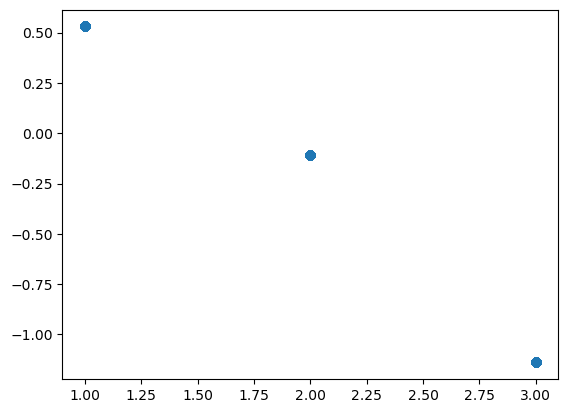

In [24]:
## import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

df_titanic_lt = titanic_training_data_cleaned.copy()  # lt = logit transform

# Define continuous variables
continuous_var = ['Pclass']

# Add logit transform interaction terms (natural log) for continuous variables e.g. Age * Log(Age)
for var in continuous_var:
    df_titanic_lt[f'{var}:Log_{var}'] = df_titanic_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log

# Keep columns related to continuous variables
cols_to_keep = continuous_var + df_titanic_lt.columns.tolist()[-len(continuous_var):]
cols_to_keep

# Redefine independent variables to include interaction terms
X_lt = df_titanic_lt[cols_to_keep]
y_lt = df_titanic_lt['Survived']

# Add constant
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

predicted = logit_results.predict(X_lt_constant)

# Get log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor continuous variable vs logit values (Age)
plt.scatter(x=X_lt_constant['Pclass'].values, y=log_odds);
plt.show()

#### A visual inspection of this assumption:

* We are interested in the p-values for the logit transformed interaction terms of Pclass:Log_Pclass 
* From the summary table above, the p value for Pclass:Log_Pclass is > .05, which is non-significant
* This means that there is linearity in the PClass feature, and the assumption has been not been violated. 
* <i> Note: Pclass is treated as continuous/numerical in this model</i>

### LDA Model

LinearDiscriminantAnalysis()

Coefficients: [[-0.93688562  0.35078045 -1.61862964 -0.00919148 -0.24042946]]
Means: [[ 0.26715372 -0.09647984  0.42885221 -0.00288115  0.11814043]
 [-0.42885202  0.15487553 -0.68842066  0.004625   -0.18964648]]
Score: 0.7912457912457912


Text(0.5, 1.0, 'LDA ROC Curve')

Text(0.5, 1.0, 'LDA Precision-Recall Curve')

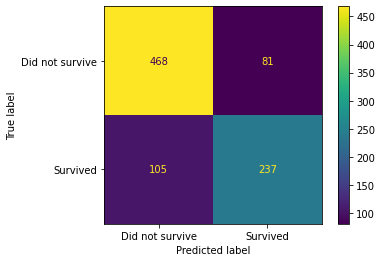

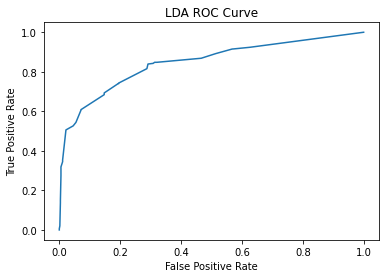

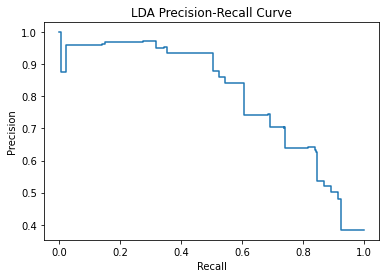

In [26]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(classification_model_data)
y = Survived
lda = LinearDiscriminantAnalysis(solver = 'svd')
lda.fit(X, y)
predictions = lda.predict(X)

# Basic stats for LDA result

print('Coefficients:',lda.coef_)
print('Means:',lda.means_)
print('Score:',lda.score(X,y))

# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

cm = confusion_matrix(y, predictions)
cm_lda = cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive','Survived'])
disp.plot()

# Curves

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

probabilities = lda.predict_proba(X)[:,1]

fpr, tpr, _ = roc_curve(np.array(Survived), probabilities)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('LDA ROC Curve')

prec, recall, _ = precision_recall_curve(Survived, probabilities)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('LDA Precision-Recall Curve')

### QDA Model

QuadraticDiscriminantAnalysis()

Means: [[ 0.26715372 -0.09647984  0.42885221 -0.00288115  0.11814043]
 [-0.42885202  0.15487553 -0.68842066  0.004625   -0.18964648]]
Score: 0.7676767676767676


Text(0.5, 1.0, 'QDA ROC Curve')

Text(0.5, 1.0, 'QDA Precision-Recall Curve')

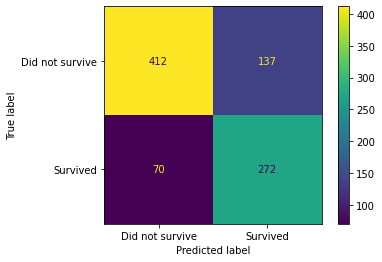

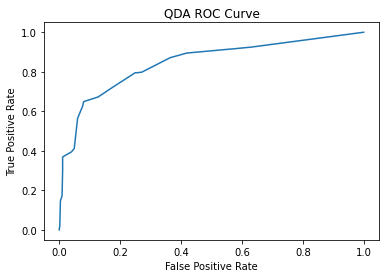

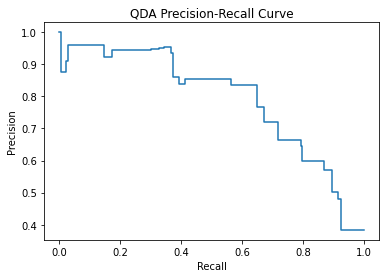

In [27]:
# Try with QDA (Quadratic Discriminant Analysis)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

# Basic stats for QDA result

print('Means:',qda.means_)
print('Score:',qda.score(X,y))

predictions = qda.predict(X)
probabilities = qda.predict_proba(X)[:,1]

# Confusion
cm = confusion_matrix(y, predictions)
cm_qda = cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive','Survived'])
disp.plot()

# Curves
fpr, tpr, _ = roc_curve(y, probabilities)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('QDA ROC Curve')

prec, recall, _ = precision_recall_curve(y, probabilities)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('QDA Precision-Recall Curve')

In [28]:
# More detialed performance statistics: 

#Sensitivity = TP / (TP + FN) = recall  = TPR
#Specificity = TN / (TN + FP) = TNR 
#Precision = TP / (TP + FP) = PPV
#PPV = TP / ( TP + FP )  (sensitivity * prevalence) / ((sensitivity * prevalence) + (1-specificity) (1-prevalence))
#NPV = TN / (TN + FN) = ((specificity * (1-prevalence)) / ( (sensitivity * (1-prevelence) + (1-specificity)(1-prevalence)) 

#Recall = 
#Precision = (sensitivity * prevalence) / ((sensitivity * prevalence) + (1-specificity) (1-prevalence)) = (0.93 * 0.05) / (0.93 * 0.05 + 0.02 * (1 - 0.05) ) = 0.71

### QDA ###

tn = cm_logistic[0,0]
fp = cm_logistic[0,1]
fn = cm_logistic[1,0]
tp = cm_logistic[1,1]

print('')
print('Logistic Regression')
print('sensitivity', tp / (tp + fn))
print('specificity', tn / (tn + fp))
print('recall', tp / (tp + fn))
print('precision', tp / (tp + fp))
print('accuracy', (tp + tn)/(tp+tn+fp+fn))
#print('training logistic sklearn score',logit_model.score(X,y)) # using 'score' method for scikitlearn package




### LDA ###

tn = cm_lda[0,0]
fp = cm_lda[0,1]
fn = cm_lda[1,0]
tp = cm_lda[1,1]

print('')
print('LINEAR DISCRIMINANT ANALYSIS')
print('sensitivity', tp / (tp + fn))
print('specificity', tn / (tn + fp))
print('recall', tp / (tp + fn))
print('precision', tp / (tp + fp))
print('accuracy', (tp + tn)/(tp+tn+fp+fn))
print('training LDA sklearn score',lda.score(X,y)) # using 'score' method for scikitleran package 
### QDA ###

tn = cm_qda[0,0]
fp = cm_qda[0,1]
fn = cm_qda[1,0]
tp = cm_qda[1,1]

print('')
print('QUADRATIC DISCRIMINANT ANALYSIS')
print('sensitivity', tp / (tp + fn))
print('specificity', tn / (tn + fp))
print('recall', tp / (tp + fn))
print('precision', tp / (tp + fp))
print('accuracy', (tp + tn)/(tp+tn+fp+fn))
print('training QDA sklearn score',qda.score(X,y)) # using 'score' method for scikitlearn package
                             
                             



Logistic Regression
sensitivity 0.7397660818713451
specificity 0.8051001821493625
recall 0.7397660818713451
precision 0.7027777777777777
accuracy 0.7800224466891134

LINEAR DISCRIMINANT ANALYSIS
sensitivity 0.6929824561403509
specificity 0.8524590163934426
recall 0.6929824561403509
precision 0.7452830188679245
accuracy 0.7912457912457912
training LDA sklearn score 0.7912457912457912

QUADRATIC DISCRIMINANT ANALYSIS
sensitivity 0.7953216374269005
specificity 0.7504553734061931
recall 0.7953216374269005
precision 0.6650366748166259
accuracy 0.7676767676767676
training QDA sklearn score 0.7676767676767676


QDA appears to have somewhat better metrics for both recall and precision, but slightly worse performance with respect to specificity. As a result, the overall 'accuracy' metric of LDA appears slightly preferablet to QDA. We also consider the 'score' method for the sklearn implementation of each model. This attribute is the 

### Create K-Nearest Neighbors Model

Make modifications to the training dataset that are specifically needed for a K-Nearest Neighbors model

In [29]:
# Create a new training dataframe specifically for the KNN model so that we don't interfere with the training dataset
# used for other models
knn_training_validation_df = titanic_training_data_cleaned.copy(deep=True)

# dummy encode the Sex and PClass variables
knn_training_validation_df = pd.get_dummies(knn_training_validation_df, columns=['Sex'], drop_first=True)

# Apply Min-Max Scaling to the Fare variable
import os
from sklearn.preprocessing import MinMaxScaler
 
min_max_scaler = MinMaxScaler()
 
knn_training_validation_df[['min_max_scaled_fare']] = min_max_scaler.fit_transform(knn_training_validation_df[['Fare']])
knn_training_validation_df[['min_max_scaled_Pclass']] = min_max_scaler.fit_transform(knn_training_validation_df[['Pclass']])

# show first five rows of the data
knn_training_validation_df.head(10)

# Check that min-max scaling applied to the fare variable correctly
knn_training_validation_df['min_max_scaled_fare'].describe()
knn_training_validation_df['min_max_scaled_Pclass'].describe()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator,encoded_Embarked,encoded_FirstCabinDeck,encoded_Sex,Sex_male,min_max_scaled_fare,min_max_scaled_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,None,0,2,7,1,1,0.014151,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,C,0,0,2,0,0,0.139136,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0,None,0,2,7,0,0,0.015469,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,C,0,2,2,0,0,0.103644,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,None,0,2,7,1,1,0.015713,1.0
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,Q,0,None,0,1,7,1,1,0.016510,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,S,1,E,0,2,4,1,1,0.101229,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,S,0,None,1,2,7,1,1,0.041136,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,S,0,None,0,2,7,0,0,0.021731,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,C,0,None,1,0,7,0,0,0.058694,0.5


count    891.000000
mean       0.062858
std        0.096995
min        0.000000
25%        0.015440
50%        0.028213
75%        0.060508
max        1.000000
Name: min_max_scaled_fare, dtype: float64

count    891.000000
mean       0.654321
std        0.418036
min        0.000000
25%        0.500000
50%        1.000000
75%        1.000000
max        1.000000
Name: min_max_scaled_Pclass, dtype: float64

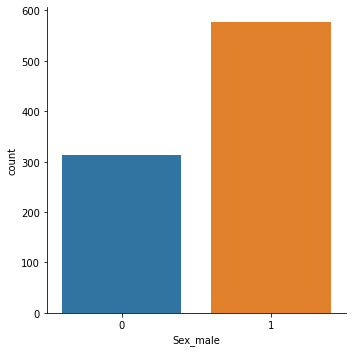

In [30]:
# Create visualizations for the distributions for each of our new variables

# New Indicator Variable Visualizations - Sex_male
sns.catplot(x = 'Sex_male', kind = 'count', data = knn_training_validation_df)


<Axes: >

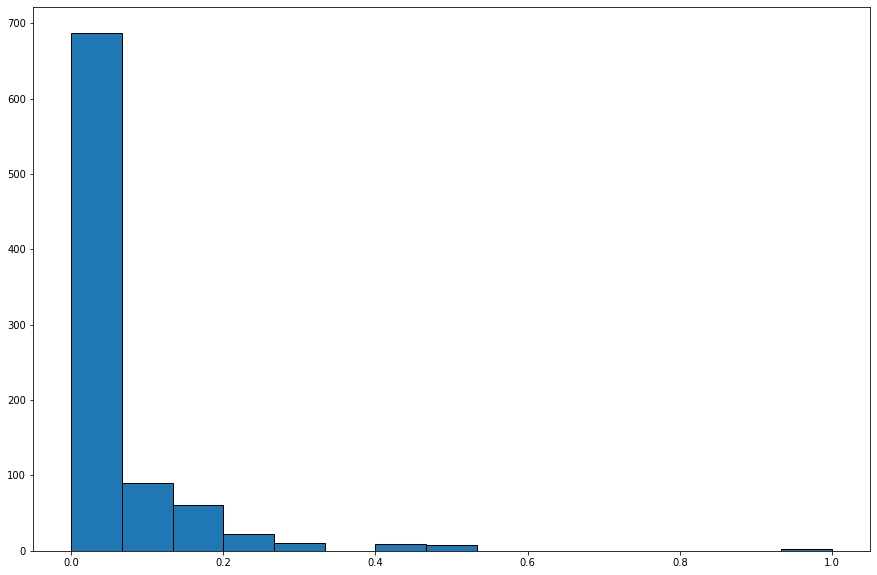

In [31]:
# New Numeric Variable Visualizations - Min_Max_Scaled_Fare
knn_training_validation_df['min_max_scaled_fare'].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             grid = False)


<Axes: >

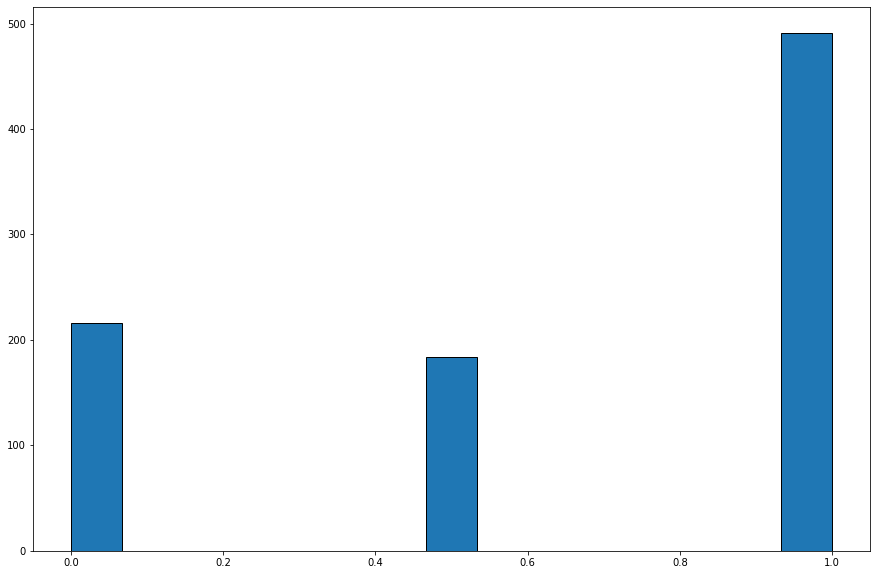

In [32]:
# New Numeric Variable Visualizations - Min_Max_Scaled_Pclass
knn_training_validation_df['min_max_scaled_Pclass'].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             grid = False)

Split the KNN training/validation dataframe into two training and validation dataframes (which will better enable us to tune hyperparameters later).

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Split Kaggle's Training dataframe into training and validation dataframes
knn_training_validation_x = knn_training_validation_df.drop(columns=['PassengerId', 
                                                                     'Survived',
                                                                    'Pclass',
                                                                    'Name',
                                                                    'Age',
                                                                    'SibSp',
                                                                    'Parch',
                                                                    'Ticket',
                                                                    'Fare',
                                                                    'Embarked',
                                                                    'First_Cabin_Deck'])
knn_training_validation_y = knn_training_validation_df['Survived']

X_train_knn, X_validation_knn, y_train_knn, y_validation_knn = train_test_split(knn_training_validation_x,
                                                                                knn_training_validation_y,
                                                                                test_size=0.2, 
                                                                                random_state=1)

# Fit a K-Nearest Neighbors Model to the Training Dataframe 
# Use the validation dataframe to tune the hyperparameters in such a way that we find the best values for K and for 
# model weights.

parameters = {
     "n_neighbors": range(1, 50),
     "weights": ["uniform", "distance"],
 }

gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train_knn, y_train_knn)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

knn_optimal_weights_method = gridsearch.best_params_["weights"]

knn_optimal_k = gridsearch.best_params_["n_neighbors"]

print(f"The optimal value of k is {knn_optimal_k}.")

print(f"The optimal way of assigning weights in the knn model is via the {knn_optimal_weights_method} method.")




GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

The optimal value of k is 12.
The optimal way of assigning weights in the knn model is via the uniform method.


In [34]:
{'n_neighbors': knn_optimal_k, 'weights': knn_optimal_weights_method}
validation_preds_grid = gridsearch.predict(X_validation_knn)
validation_mse = mean_squared_error(y_validation_knn, validation_preds_grid)
validation_rmse = sqrt(validation_mse)

print(f"After applying the optimal KNN model to the validation dataset, the root mean squared error of the predictions is {validation_rmse:.4f}.")


{'n_neighbors': 12, 'weights': 'uniform'}

After applying the optimal KNN model to the validation dataset, the root mean squared error of the predictions is 0.4012.


Create a Receiving Operating Characteristic (ROC) Curve using the data from the validation dataset

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'Sensitivity')

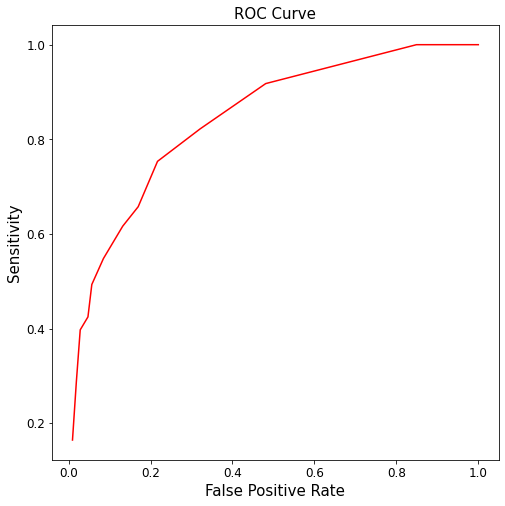

In [35]:
from matplotlib import rcParams

validation_df_knn = X_validation_knn.join(y_validation_knn)
validation_df_knn['knn_prediction'] = validation_preds_grid.tolist()

rcParams['figure.figsize'] = 8, 8

Survived = validation_df_knn[validation_df_knn["Survived"].isin([1])]
Died = validation_df_knn[validation_df_knn["Survived"].isin([0])]

Survived_Count = Survived.shape[0]
Died_Count = Died.shape[0]

Prediction_Cutoff = np.arange(0, 1, 0.01).tolist()
Cutoff_df = pd.DataFrame(Prediction_Cutoff, columns=['Prediction_Cutoff'])

Sensitivity_List = []
False_Positive_List = []
Precision_List = []


for pc in Cutoff_df['Prediction_Cutoff']:
    true_positive_count = (Survived['knn_prediction'] >= pc).sum()
    Sensitivity_List.append(true_positive_count / Survived_Count)
    false_positive_count = (Died['knn_prediction'] >= pc).sum()
    False_Positive_List.append(false_positive_count / Died_Count)
    Precision_List.append(true_positive_count / (true_positive_count + false_positive_count))     

Cutoff_df['Sensitivity'] = Sensitivity_List
Cutoff_df['False Positive Rate'] = False_Positive_List
Cutoff_df['Precision'] = Precision_List

fig, ax = plt.subplots()
ax.plot(Cutoff_df['False Positive Rate'], Cutoff_df['Sensitivity'], 'red')
ax.set_title('ROC Curve', fontsize = 15)
ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.set_ylabel('Sensitivity', fontsize = 15)

plt.tick_params(axis='both', which='major', labelsize=12)

Create a Precision - Recall Curve using the data from the validation dataset

Text(0.5, 1.0, 'Precision - Recall Curve')

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

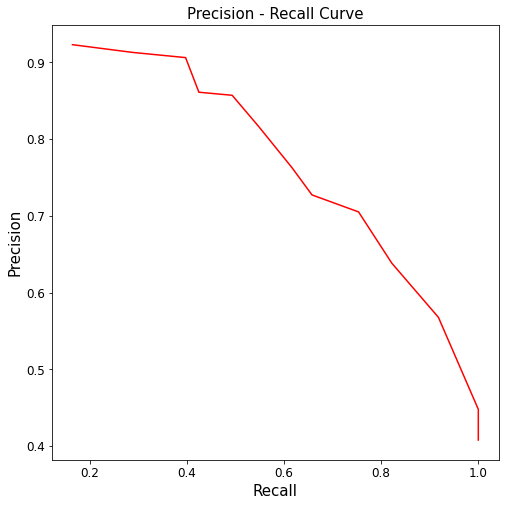

In [36]:
fig, ax = plt.subplots()
ax.plot(Cutoff_df['Sensitivity'], Cutoff_df['Precision'], 'red')
ax.set_title('Precision - Recall Curve', fontsize = 15)
ax.set_xlabel('Recall', fontsize = 15)
ax.set_ylabel('Precision', fontsize = 15)

plt.tick_params(axis='both', which='major', labelsize=12)

Find the cutoff value that maximizes the percent of the validation dataset assigned accurate predictions

In [37]:
Cutoff_df['Specificity'] = 1 - Cutoff_df['False Positive Rate'] 
Cutoff_df['Percent_Correctly_Predicted_In_Validation_DF'] = ( ( Survived.shape[0] * Cutoff_df['Specificity'] ) + (Died.shape[0] * Cutoff_df['Sensitivity']) ) / (Survived.shape[0] + Died.shape[0] )

KNN_Cutoff_Shortlist_df = Cutoff_df[Cutoff_df.Percent_Correctly_Predicted_In_Validation_DF == Cutoff_df.Percent_Correctly_Predicted_In_Validation_DF.max()]

Optimal_KNN_Cutoff = KNN_Cutoff_Shortlist_df['Prediction_Cutoff'].median()

print(f"The optimal cutoff boundary for predicting survivals for this model is {Optimal_KNN_Cutoff:.4f}.")

The optimal cutoff boundary for predicting survivals for this model is 0.2950.


### Import and Clean Testing Dataset

Import the Titanic Testing Dataset

In [38]:
import pandas as pd
titanic_testing_data = pd.read_csv('test.csv')

# show first five rows of the data
titanic_testing_data.head(100)
# show number of columns and rows
titanic_testing_data.shape

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


(418, 11)

Check the testing dataset for missing values

In [39]:
# find null counts, percentage of null values, and column type
null_count = titanic_testing_data.isnull().sum()
null_percentage = titanic_testing_data.isnull().sum() * 100 / len(titanic_testing_data)
column_type = titanic_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
Cabin,327,78.229665,object
Age,86,20.574163,float64
Fare,1,0.239234,float64


Appropriately address the missing values in the testing dataframe.  Add the newly created variables as well to the testing dataframe.

In [40]:
# Create a new dataframe called titanic_training_data_cleaned so we don't modify the originally imported data
titanic_testing_data_cleaned = titanic_testing_data.copy(deep=True)

# change Null for Fare with the median value from the Training dataset
titanic_testing_data_cleaned['Fare'].fillna(titanic_training_data_cleaned['Fare'].median(), inplace=True)

# fill Nulls for Age with median value from the Training dataset
titanic_testing_data_cleaned['Age'].fillna(titanic_training_data_cleaned['Age'].median(), inplace=True)

# Create new cabin-related variables that will be more useful and cleaner than the original cabin variable
titanic_testing_data_cleaned['Cabin_Data_Indicator'] = titanic_testing_data_cleaned['Cabin'].notna().astype(int)

titanic_testing_data_cleaned['First_Cabin_Deck'] = np.where(titanic_testing_data_cleaned['Cabin_Data_Indicator'] == 1,
                                                             titanic_testing_data_cleaned['Cabin'].astype(str).str[0],
                                                             'None')

# Create a new variable indicating whether a passenger is a child
titanic_testing_data_cleaned['Child_Indicator'] = titanic_testing_data_cleaned['Age'] <= 17
titanic_testing_data_cleaned['Child_Indicator'] = titanic_testing_data_cleaned['Child_Indicator'].astype(int)

# Drop the original Cabin variable since it has so many null values and since some passengers had more than one cabin
# making the original variable difficult to work with
titanic_testing_data_cleaned.drop(['Cabin'],axis=1,inplace=True)



Examine whether the desired modifications to the testing dataframe applied correctly.

In [41]:
# show first five rows of the data
titanic_training_data_cleaned.head(20)
# show number of columns and rows
titanic_training_data_cleaned.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator,encoded_Embarked,encoded_FirstCabinDeck,encoded_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,None,0,2,7,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C,0,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,None,0,2,7,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C,0,2,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,None,0,2,7,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,None,0,1,7,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,E,0,2,4,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,None,1,2,7,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,None,0,2,7,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,None,1,0,7,0


(891, 17)

In [42]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data_cleaned.isnull().sum()
null_percentage = titanic_training_data_cleaned.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data_cleaned.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


Conduct exploratory data analysis on the variables in the testing dataframe to confirm that all the values appear to be reasonable (to proactively address data value errors if needed).

,Age,Fare,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000
mean,29.805024,35.576535,0.447368,0.392344
std,12.667969,55.850103,0.896760,0.981429
min,0.170000,0.000000,0.000000,0.000000
25%,23.000000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,35.750000,31.471875,1.000000,0.000000
max,76.000000,512.329200,8.000000,9.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>]], dtype=object)

<Axes: title={'center': 'Pclass'}>

<Axes: title={'center': 'Embarked'}>

<Axes: title={'center': 'First_Cabin_Deck'}>

<Axes: title={'center': 'Sex'}>

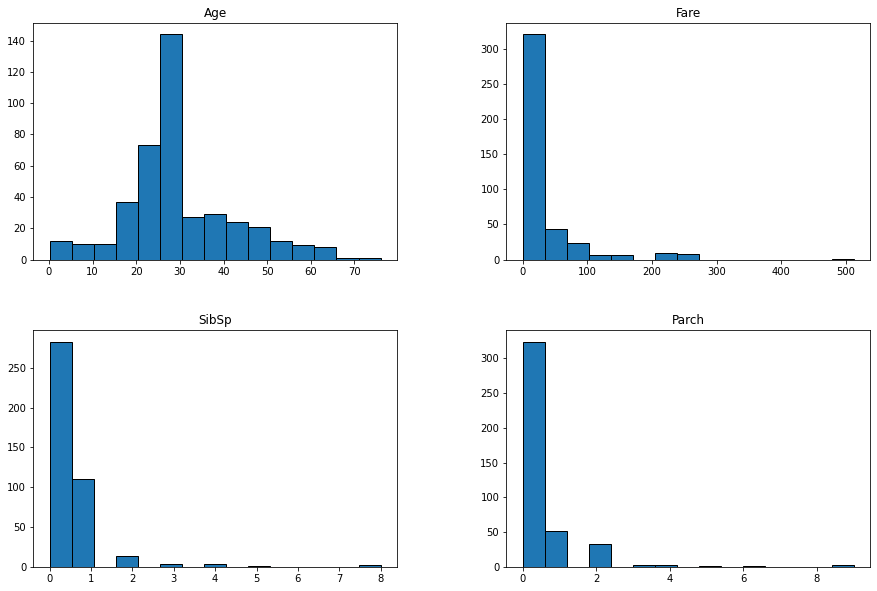

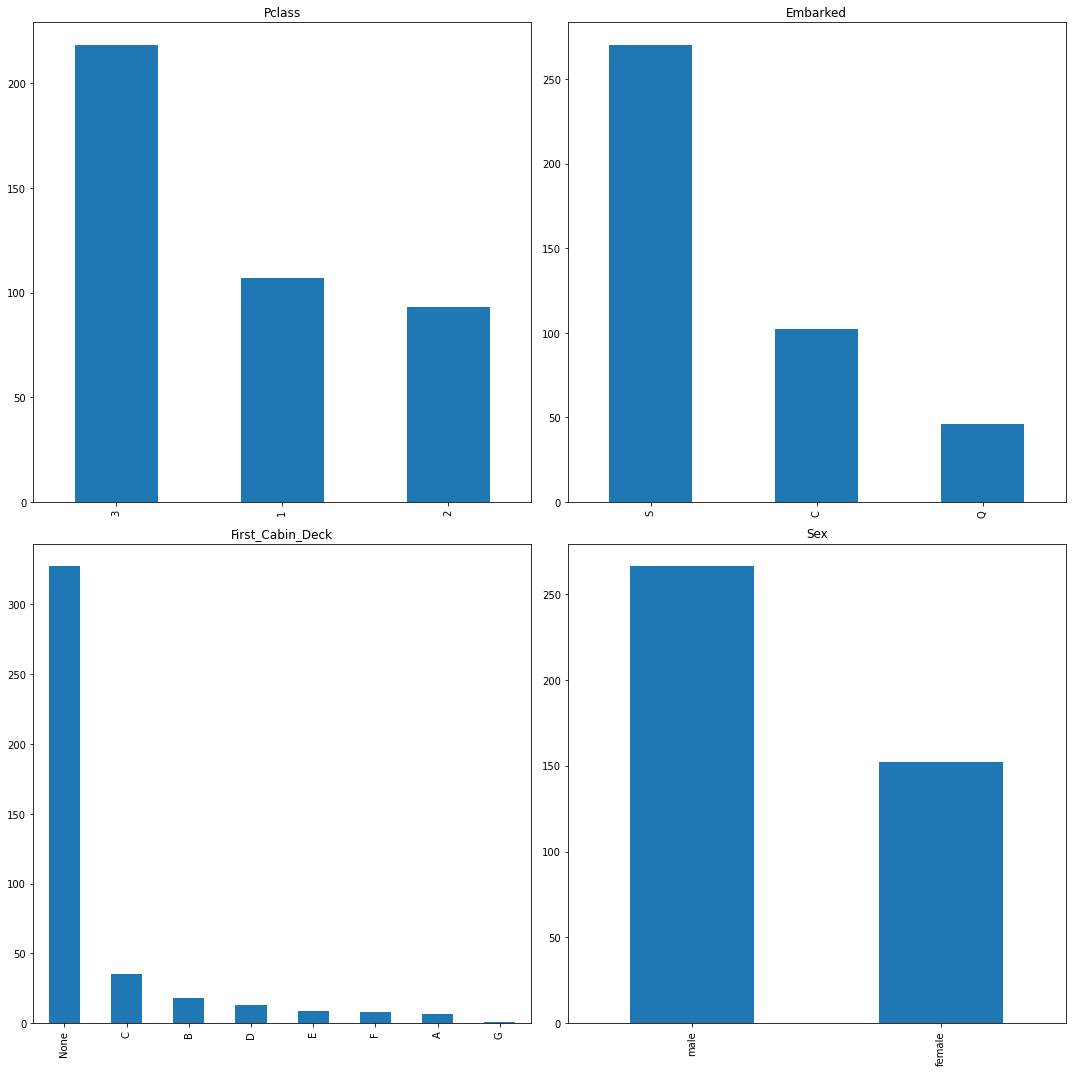

In [43]:
# Numeric Variable Visualizations
titanic_testing_data_cleaned[numeric_variables].describe()

titanic_testing_data_cleaned[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)


    
# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_testing_data_cleaned[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()

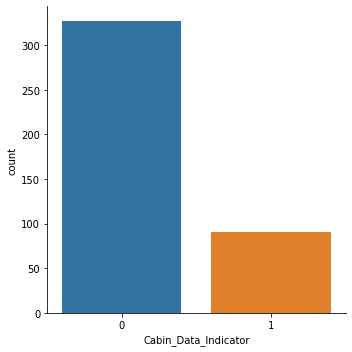

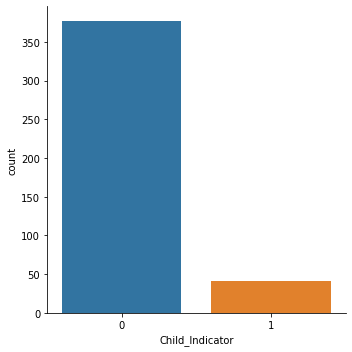

In [44]:
# Indicator Variable Visualizations
indicator_predictors = ['Cabin_Data_Indicator', 'Child_Indicator']


for var, subplot in zip(indicator_predictors, ax.flatten()):
    sns.catplot(x = var, kind = 'count', data = titanic_testing_data_cleaned)

fig.tight_layout()

### Encode Embarked, Sex, and First Cabin Deck in Test Dataset

In [45]:
# Encode Embarked, Sex, and First Cabin Deck
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Embarked
le.fit(np.array(titanic_testing_data_cleaned['Embarked']).reshape(-1,1))
titanic_testing_data_cleaned['encoded_Embarked'] = le.transform(titanic_testing_data_cleaned['Embarked'])

# Cabin Deck
le.fit(np.array(titanic_testing_data_cleaned['First_Cabin_Deck']).reshape(-1,1))
titanic_testing_data_cleaned['encoded_FirstCabinDeck'] = le.transform(titanic_testing_data_cleaned['First_Cabin_Deck'])

# Sex
le.fit(np.array(titanic_testing_data_cleaned['Sex']).reshape(-1,1))
titanic_testing_data_cleaned['encoded_Sex'] = le.transform(titanic_testing_data_cleaned['Sex'])


test_classification_model_data = titanic_testing_data_cleaned.drop(                                                            
                                                               columns=['Sex','PassengerId','Name','Ticket',
                                                                        'Embarked','First_Cabin_Deck',
                                                                        'Age', 'SibSp', 'Fare', 'encoded_FirstCabinDeck',
                                                                        'Parch', 'Cabin_Data_Indicator'
                                                                       ])
test_classification_model_data.head(10)

C:\Users\cmark\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LabelEncoder()

LabelEncoder()

LabelEncoder()

,Pclass,Child_Indicator,encoded_Embarked,encoded_Sex
0,3,0,1,1
1,3,0,2,0
2,2,0,1,1
3,3,0,2,1
4,3,0,2,0
5,3,1,2,1
6,3,0,1,0
7,2,0,2,1
8,3,0,0,0
9,3,0,2,1


#### Encode Categorical Variables (Embarked)

In [46]:
cat_vars=['encoded_Embarked']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(test_classification_model_data[var], prefix=var)
    test_classification_model_data=test_classification_model_data.join(cat_list)

data_vars=test_classification_model_data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

test_data_final=test_classification_model_data[to_keep]
test_data_final.columns.values


test_classification_model_data = test_classification_model_data.drop(                                                            
                                                               columns=['encoded_Embarked_0', 'encoded_Embarked'
                                                                       ])

# show dataframe with encoded categorical variables
test_classification_model_data.head(10)

array(['Pclass', 'Child_Indicator', 'encoded_Sex', 'encoded_Embarked_0',
       'encoded_Embarked_1', 'encoded_Embarked_2'], dtype=object)

,Pclass,Child_Indicator,encoded_Sex,encoded_Embarked_1,encoded_Embarked_2
0,3,0,1,1,0
1,3,0,0,0,1
2,2,0,1,1,0
3,3,0,1,0,1
4,3,0,0,0,1
5,3,1,1,0,1
6,3,0,0,1,0
7,2,0,1,0,1
8,3,0,0,0,0
9,3,0,1,0,1


### Apply Logistic Regression Model to the Testing Dataset

In [47]:
# Generate predictions on test dataset

# predictors
X_test = np.array(test_classification_model_data)

# add constant
X_test = sm.add_constant(X_test)

# use logistic model constructed using the training dataset
probabilities = result.predict(X_test)

# Convert probabilities to binary predictions using a 0.5 threshold
y_test_pred = np.where(probabilities > 0.5, 1, 0)


In [48]:
# Put the logistic predictions into a Pandas dataframe
prediction_df_logistic = pd.DataFrame(y_test_pred, columns=['Survived'])


# Add the PassengerId column to the front of the logistic predictions dataframe
prediction_df_logistic.insert(0, 'PassengerId', titanic_testing_data_cleaned['PassengerId'])

# Show first 5 rows of the df
prediction_df_logistic.head()

# Output predictions to csv
prediction_df_logistic.to_csv('test_predictions_logistic_v1.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<Figure size 1080x1080 with 0 Axes>

(-0.5, 852.5, 609.5, -0.5)

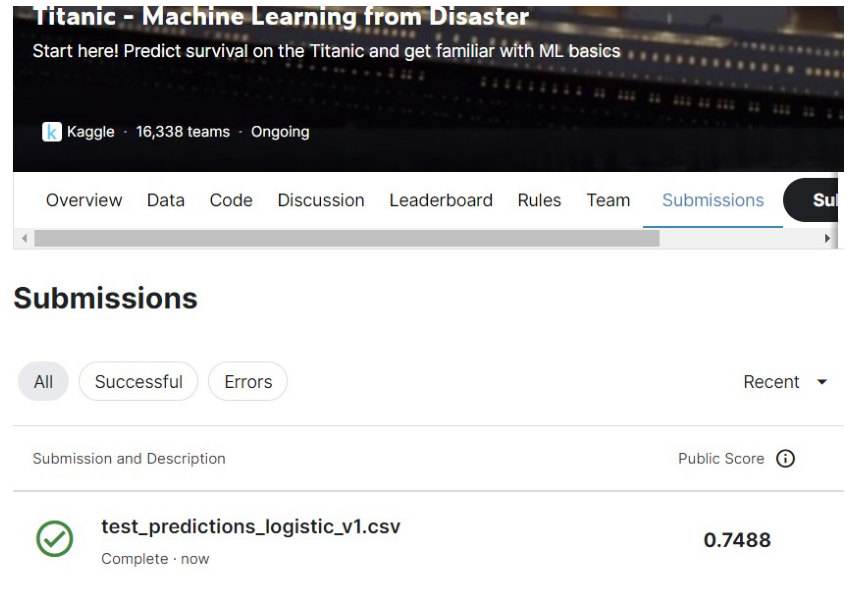

In [49]:
# Display the kaggle results associated with the Logistic Regression
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Titanic_Logistic_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### Apply LDA Model to Testing Dataset

In [56]:
# Generate predictions on test dataset

# scale predictors since that is what we did in the training data
scaler = StandardScaler()
X_test_scale = scaler.fit_transform(test_classification_model_data)

# predict survival on test dataset using lda model
lda_probabilities = lda.predict(X_test_scale)

# Convert probabilities to binary predictions using a 0.5 threshold
y_test_lda_pred = np.where(lda_probabilities > 0.5, 1, 0)


In [57]:
# Put the lda predictions into a Pandas dataframe
prediction_df_lda = pd.DataFrame(y_test_lda_pred, columns=['Survived'])

# Add the PassengerId column to the front of the lda predictions dataframe
prediction_df_lda.insert(0, 'PassengerId', titanic_testing_data_cleaned['PassengerId'])

# Show first 5 rows of the df
prediction_df_lda.head()

# Output predictions to csv
prediction_df_lda.to_csv('test_predictions_lda_v1.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<Figure size 1080x1080 with 0 Axes>

(-0.5, 1231.5, 579.5, -0.5)

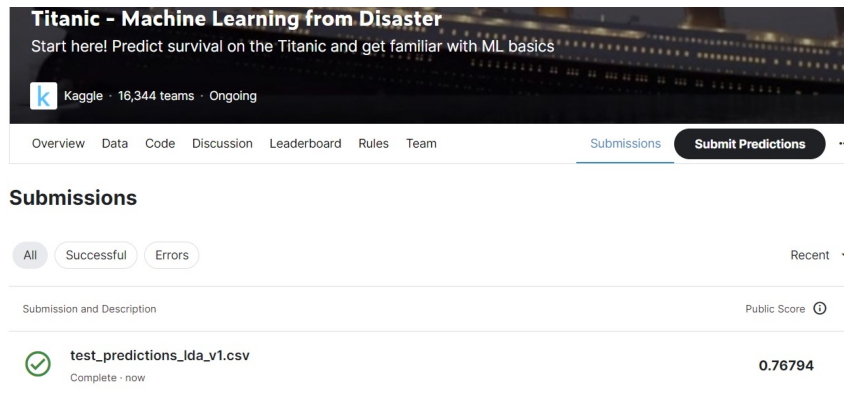

In [58]:
# Display the kaggle results associated with the LDA
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Titanic_LDA_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### Apply QDA Model to Testing Dataset

In [59]:
# Generate predictions on test dataset

# scale predictors since that is what we did in the training data
scaler = StandardScaler()
X_test_scale = scaler.fit_transform(test_classification_model_data)

# predict survival on test dataset using qda model
qda_probabilities = qda.predict(X_test_scale)

# Convert probabilities to binary predictions using a 0.5 threshold
y_test_qda_pred = np.where(qda_probabilities > 0.5, 1, 0)


In [60]:
# Put the qda predictions into a Pandas dataframe
prediction_df_qda = pd.DataFrame(y_test_qda_pred, columns=['Survived'])

# Add the PassengerId column to the front of the qda predictions dataframe
prediction_df_qda.insert(0, 'PassengerId', titanic_testing_data_cleaned['PassengerId'])

# Show first 5 rows of the df
prediction_df_qda.head()

# Output predictions to csv
prediction_df_qda.to_csv('test_predictions_qda_v1.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


<Figure size 1080x1080 with 0 Axes>

(-0.5, 1250.5, 570.5, -0.5)

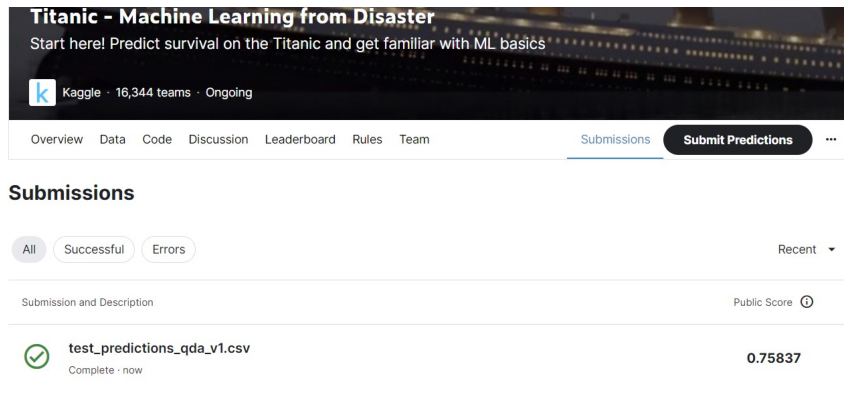

In [61]:
# Display the kaggle results associated with the QDA
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Titanic_QDA_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### Apply K-Nearest Neighbors Model to the Testing Dataset

Adjust the testing dataset to reflect the modifications made to the KNN training dataset

In [50]:
# Create a new training dataframe specifically for the KNN model so that we don't interfere with the training dataset
# used for other models
knn_testing_df = titanic_testing_data_cleaned.copy(deep=True)

# dummy encode the Sex and PClass variables
knn_testing_df = pd.get_dummies(knn_testing_df, columns=['Sex'], drop_first=True)

# Apply Min-Max Scaling to the Fare variable

min_max_scaler = MinMaxScaler()
 
knn_testing_df[['min_max_scaled_fare']] = min_max_scaler.fit_transform(knn_testing_df[['Fare']])
knn_testing_df[['min_max_scaled_Pclass']] = min_max_scaler.fit_transform(knn_testing_df[['Pclass']])


# show first five rows of the data
knn_testing_df.head(10)

# Check that min-max scaling applied to the fare variable correctly
knn_testing_df['min_max_scaled_fare'].describe()
knn_testing_df['min_max_scaled_Pclass'].describe()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,First_Cabin_Deck,Child_Indicator,encoded_Embarked,encoded_FirstCabinDeck,encoded_Sex,Sex_male,min_max_scaled_fare,min_max_scaled_Pclass
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,0,None,0,1,7,1,1,0.015282,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,0,None,0,2,7,0,0,0.013663,1.0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,0,None,0,1,7,1,1,0.018909,0.5
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,0,None,0,2,7,1,1,0.016908,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,0,None,0,2,7,0,0,0.023984,1.0
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,S,0,None,1,2,7,1,1,0.018006,1.0
6,898,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,Q,0,None,0,1,7,0,0,0.014891,1.0
7,899,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,S,0,None,0,2,7,1,1,0.056604,0.5
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,C,0,None,0,0,7,0,0,0.014110,1.0
9,901,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,S,0,None,0,2,7,1,1,0.047138,1.0


count    418.000000
mean       0.069441
std        0.109012
min        0.000000
25%        0.015412
50%        0.028213
75%        0.061429
max        1.000000
Name: min_max_scaled_fare, dtype: float64

count    418.000000
mean       0.632775
std        0.420919
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: min_max_scaled_Pclass, dtype: float64

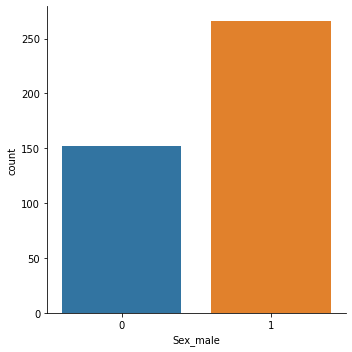

In [51]:
# Create visualizations for the distributions for each of our new variables

# New Indicator Variable Visualizations
sns.catplot(x = 'Sex_male', kind = 'count', data = knn_testing_df)



<Axes: >

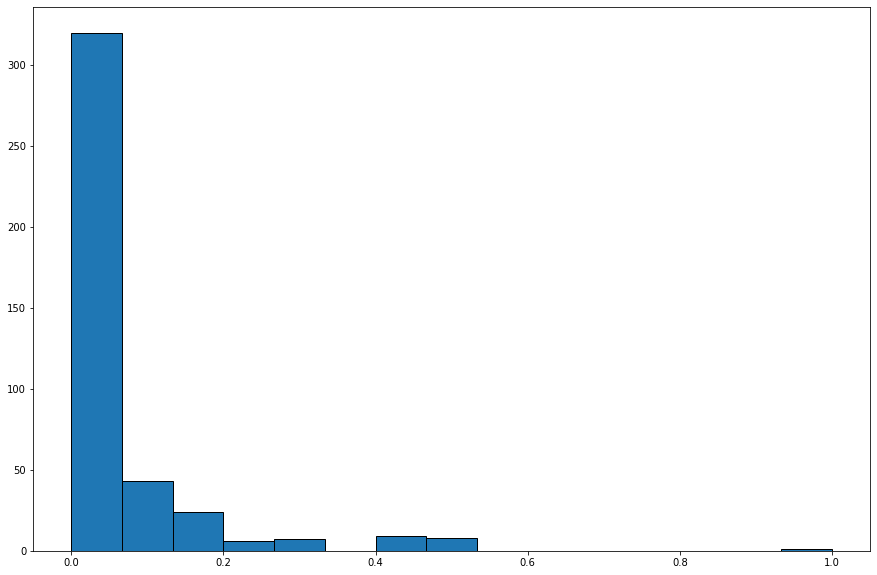

In [52]:
# New Numeric Variable Visualizations - min_max_scaled_fare
knn_testing_df['min_max_scaled_fare'].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             grid = False)



<Axes: >

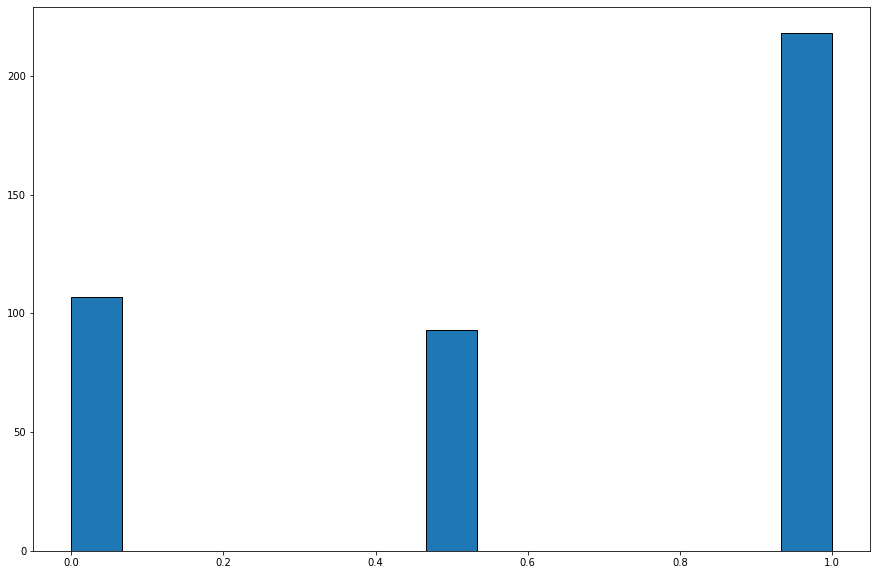

In [53]:
# New Numeric Variable Visualizations - min_max_scaled_pclass
knn_testing_df['min_max_scaled_Pclass'].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             grid = False)

Apply the K Nearest Neighbors Model to the Testing Dataset

In [54]:
# Apply the K - Nearest Model to Elicit Predictions For Testing Dataset
knn_testing_x = knn_testing_df.drop(columns=['PassengerId', 
                                            'Pclass',
                                            'Name',
                                            'Age',
                                            'SibSp',
                                            'Parch',
                                            'Ticket',
                                            'Fare',
                                            'Embarked',
                                            'First_Cabin_Deck'])

knn_testing_preds_grid = gridsearch.predict(knn_testing_x)

# Put the KNN predictions into a Pandas dataframe
prediction_df_knn = pd.DataFrame(knn_testing_preds_grid, columns=['KNN_Prediction'])


# Add the PassengerId column to the front of the KNN predictions dataframe
prediction_df_knn.insert(0, 'PassengerId', knn_testing_df['PassengerId'])

# Use the Optimal Cutoff Boundary Determined Earlier to Turn Predictions into zeros and ones
prediction_df_knn['Survived'] = np.where(prediction_df_knn['KNN_Prediction'] >= Optimal_KNN_Cutoff, 1, 0)

# Drop the KNN_Prediction Column
prediction_df_knn.drop(['KNN_Prediction'],axis=1,inplace=True)

#output predictions to csv
prediction_df_knn.to_csv('test_predictions_knn_v1.csv', index=False)



Display the kaggle results associated with the K-Nearest Neighbors Model

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1494.5, 337.5, -0.5)

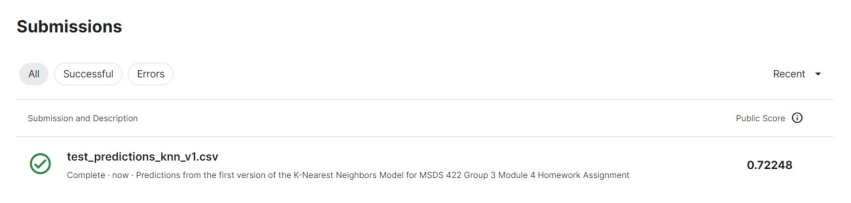

In [55]:
# Display the kaggle results associated with the KNN Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Titanic_KNN_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()